# Movie Studio: Film's Data Analysis
![Getting Started](photo/R.jpg)

## Business Understanding


Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.


In [169]:
import pandas as pd
import calendar
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Movie Budgets

In [170]:
data = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
print(data)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,8

In [171]:
df_budget = pd.DataFrame(data)
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [172]:
df_budget.info()

#There is no missing data, or na values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [173]:
df_budget.shape
df_budget.value_counts()


id   release_date  movie                     production_budget  domestic_gross  worldwide_gross
100  Sep 2, 2005   The Transporter 2         $32,000,000        $43,095,856     $88,978,458        1
34   Apr 30, 2010  Housefull                 $10,100,000        $1,183,658      $18,726,300        1
     Apr 5, 2019   The Best of Enemies       $10,000,000        $10,205,616     $10,205,616        1
     Aug 13, 2010  The Expendables           $82,000,000        $103,068,524    $268,268,174       1
     Aug 25, 2017  Birth of the Dragon       $31,000,000        $6,901,965      $7,220,490         1
                                                                                                  ..
67   Jun 15, 2005  Batman Begins             $150,000,000       $205,343,774    $359,142,722       1
     Jun 19, 1987  The Brave Little Toaster  $2,300,000         $0              $0                 1
     Jun 3, 1988   Big                       $18,000,000        $114,968,774    $151,668,774    

In [174]:
# Check to make sure the movie field doesn't contain blanks and NaNs
pd.isna(df_budget['movie'])


0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Name: movie, Length: 5782, dtype: bool

In [175]:
# We can drop the Worldwide Domestic Gross column since we're focused in the Worldwide Gross
df_budget.drop(['domestic_gross'], axis=1)

,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [176]:
# Check that none of the movies have a production budget = 0 as they're most likely bad data
df_budget.loc[df_budget['production_budget'] == 0]

# Check that none of the movies have a Worldwide gross = 0 as they're most likely bad data, 

df_budget.loc[df_budget['worldwide_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [177]:
#We want to observe what type of data is the date column so we can work with it
#We want to analyze the date, in order to get the month and year

df_budget['Year'] = pd.DatetimeIndex(df_budget['release_date']).year
df_budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [178]:
df_budget['Year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1976, 1965, 1962, 1964, 1959, 1966, 1974, 1956,
       1975, 1973, 1960, 1967, 1968, 1971, 1951, 1972, 1961, 1946, 1944,
       1953, 1954, 1957, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1933, 1935, 1931, 1916, 1929, 1934, 1915, 1920], dtype=int64)

In [179]:
#Converting the month value into string

df_budget['Month'] = pd.DatetimeIndex(df_budget['release_date']).month
df_budget['Month'] = df_budget['Month'].apply(lambda x: calendar.month_abbr[x])
df_budget



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


In [180]:
df_budget['Day'] = pd.DatetimeIndex(df_budget['release_date']).day
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Day
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May,20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec,15
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec,31
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,Apr,2
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep,29


In [181]:
#we clean the worldwide_column and change to float type
df_budget['worldwide_gross'] = df_budget.worldwide_gross.apply(lambda x:x.replace('$','').replace(',',''))
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(float)

df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Day
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09,2009,Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,2011,May,20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,2019,Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,2015,May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09,2017,Dec,15
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0.000000e+00,2018,Dec,31
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",2.404950e+05,1999,Apr,2
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1.338000e+03,2005,Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0.000000e+00,2015,Sep,29


In [182]:
#we only let the data that is more updated
recent_movie_years = df_budget.query("Year >= 2012")
recent_movie_years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Day
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,2019,Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,2015,May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09,2017,Dec,15
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2.053311e+09,2015,Dec,18
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2.048134e+09,2018,Apr,27
...,...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,0.000000e+00,2014,Dec,31
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,0.000000e+00,2015,May,19
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584",4.584000e+03,2012,Jan,13
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0.000000e+00,2018,Dec,31


In [183]:
top_months = recent_movie_years.groupby('Month')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False)
top_months

,worldwide_gross
Month,
May,1.966963e+08
Jul,1.827063e+08
Jun,1.820579e+08
Nov,1.772135e+08
Mar,1.129238e+08
Feb,1.088123e+08
Dec,1.060714e+08
Apr,9.766331e+07
Aug,7.910308e+07


In [184]:
# Now we can reset the index so that the first column is called "Months"

top_months.index.name = "Month"
top_months.reset_index(inplace=True)
top_months

,Month,worldwide_gross
0,May,1.966963e+08
1,Jul,1.827063e+08
2,Jun,1.820579e+08
3,Nov,1.772135e+08
4,Mar,1.129238e+08
5,Feb,1.088123e+08
6,Dec,1.060714e+08
7,Apr,9.766331e+07
8,Aug,7.910308e+07
9,Jan,6.830290e+07


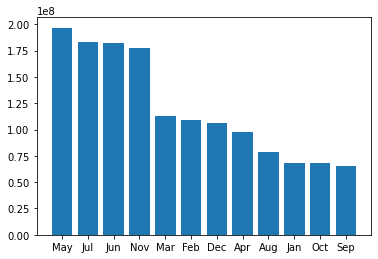

In [188]:
plt.bar(x=top_months['Month'], height=top_months['worldwide_gross'])
plt.show()

In [186]:
data = pd.read_csv(r'zippedData\tmdb.movies.csv.gz')
print(data)

       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [187]:
df_genre = pd.DataFrame(data)
df_genre.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
